# ПРОИЗВОДИТЕЛЬНОСТЬ АЛГОРИТМА ГРАДИЕНТНОГО СПУСКА

In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("data_harvest_potato_nor_rasp.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,harvest
0,87.819182,58.919279,59.933521,17.076650,59.373490,7.011549,178.291618,34.150679
1,87.332223,57.323047,67.770787,17.489714,59.220536,8.065805,188.663624,34.239028
2,89.999038,59.417227,59.809383,15.764726,57.918171,7.762093,179.108094,34.809581
3,90.985802,60.585585,64.916464,16.463727,57.691626,7.590725,178.623260,35.353490
4,86.895906,57.106282,63.712803,15.672241,56.103904,7.372190,186.617709,33.920886


In [2]:
# data = pd.DataFrame(pd.read_excel("Dataset_for_Prediction.xlsx"))
# data.head()

,Year,Area,Production,Yield,Predominantly reddish medium texture,Red desert soils,Sandy loam,Soil are lithosolsat foot hills & alluvials in plains,brown soils,clay loam,...,District_Ваran,District_Наnumangarh,District_Раli,Season_Kharif,Season_Rabi,Crop_Bajra,Crop_Barley,Crop_Jowar,Crop_Rapeseed &Mustard,Crop_Wheat
0,1997,56600,30400.0,0.537102,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,1997,105900,34600.0,0.326723,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,1997,24700,28900.0,1.170040,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,1997,36700,25400.0,0.692098,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,1997,79300,144500.0,1.822194,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [3]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
harvest        0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [10]:
x = data.drop("harvest",axis=1)
y = data[["harvest"]]

cols = ['N', 'P','K', 'temperature', 'humidity','ph','rainfall']

#selected parameters
x1 = data.drop(cols,axis=1)

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)
y = std.fit_transform(y)
x1 = std.fit_transform(x1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.02, random_state=7)
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.02, random_state=7)

## Использование всех параметров

In [11]:
x_train = x_train.reshape(x_train.shape[0],-1).T
x_test =  x_test.reshape(x_test.shape[0],-1).T
y_train = y_train.reshape(y_train.shape[0],-1).T

In [12]:
def model(x,y,dim,learning_rate):
    w = np.zeros((dim,1))
    b = 0.0

    m = x.shape[1]
    A = np.dot(w.T,x)+b
    cost = (1/(m))*np.sum((A-y)**2)

    dz = (1/m)*(A-y)
    dw = np.dot(x,dz.T)
    db = np.sum(dz)

    costs = []

    for i in range (200):
        
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
    
        if i%1000 == 0:
            costs.append(cost)
        
    parameters = {"w":w,"b":b}
    gradients = {"dw":dw,"db":db}
    
    return parameters, gradients, cost



In [13]:
def pred (w,b,x):
    m = x.shape[1]
    y_pred = np.zeros((1,m))
    w = w.reshape(x.shape[0],1)
    
    y_pred = np.dot(w.T,x)+b
    
    return y_pred

In [15]:
parameters, gradients, cost = model(x_train,y_train,7,0.001)
cost

0.9984412103836335

In [16]:
w = parameters["w"]
b = parameters["b"]

In [17]:
pred_all = pred(w,b,x_test)

In [18]:
pred_all = pred_all.reshape(pred_all.shape[0],-1).T
print(pred_all.shape)
print(y_test.shape)

(101, 1)
(101, 1)


In [19]:
auc_test = 100 - np.mean(np.abs(pred_all - y_test)*100)
auc_test

58.4002782501381

In [51]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
 
print("R2score:", r2_score(y_test,pred_all))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_all)))
print('MAE:', mean_absolute_error(y_test, pred_all))

R2score: 0.7523041306771004
RMSE: 0.5117945449457049
MAE: 0.41599721749861907


## Исползование выбранных  параметров 

In [52]:
x1_train = x1_train.reshape(x1_train.shape[0],-1).T
x1_test =  x1_test.reshape(x1_test.shape[0],-1).T

In [53]:
parameters, gradients, cost = model(x1_train,y_train,1,0.001)
cost

0.9984412103836335

In [54]:
w = parameters["w"]
b = parameters["b"]

In [67]:
pred_sel = pred(w,b,x1_test)
pred_sel = pred_sel.reshape(pred_sel.shape[0],-1).T

In [68]:
auc_test1 = 100 - np.mean(np.abs(pred_sel - y_test)*100)
auc_test1

32.88597078150066

In [69]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
 
print("R2score:", r2_score(y_test,pred_sel))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_sel)))
print('MAE:', mean_absolute_error(y_test, pred_sel))

R2score: 0.3481345683855175
RMSE: 0.8302621619476908
MAE: 0.6711402921849934


## Сравнительная диаграмма производительности

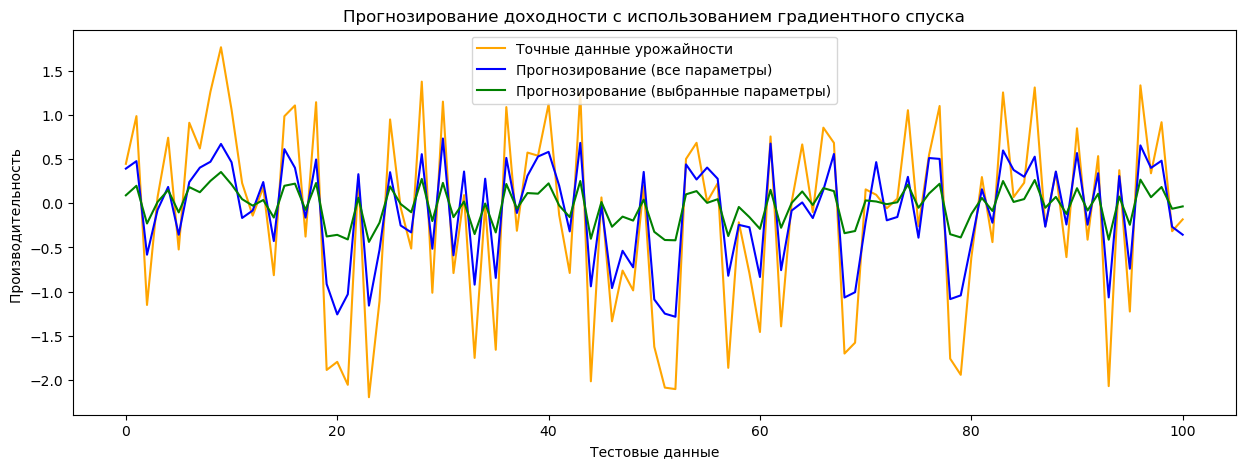

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.plot(y_test, color='orange',label='Точные данные урожайности')
plt.plot(pred_all, color='blue',label='Прогнозирование (все параметры)')
plt.plot(pred_sel, color='green',label='Прогнозирование (выбранные параметры)')
plt.title('Прогнозирование доходности с использованием градиентного спуска')
plt.xlabel("Тестовые данные")
plt.ylabel('Производительность ')
plt.legend()
plt.show()